# Predict width using height. Implement this using Linear Regression algorithm. Find the accuracy, mse, mae, best fit line & lastly save your model using pickle & joblib.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
df=pd.read_excel("Height-Width.xlsx")
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [3]:
df.head(14)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [4]:
df.tail(14)

,Height,Weight
3487,74.971936,237.575314
3488,63.275899,164.553855
3489,70.884109,190.554244
3490,69.139880,181.756130
3491,67.269994,171.474446
3492,69.893558,190.100836
3493,73.665274,222.528390
3494,65.528857,184.428199
3495,68.508851,191.395759
3496,69.296830,185.649086


In [5]:
df[3:56]

,Height,Weight
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926
11,71.640805,213.741170
12,64.766329,167.127461


In [6]:
df.Weight[8]

175.9294404

In [7]:
df.Weight.head(8)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
5    152.212156
6    183.927889
7    167.971111
Name: Weight, dtype: float64

In [8]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [9]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [11]:
df.Weight.mean()

186.891257979463

In [14]:
row,column=df.shape
print(row,column)

3501 2


In [15]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [17]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# visualization

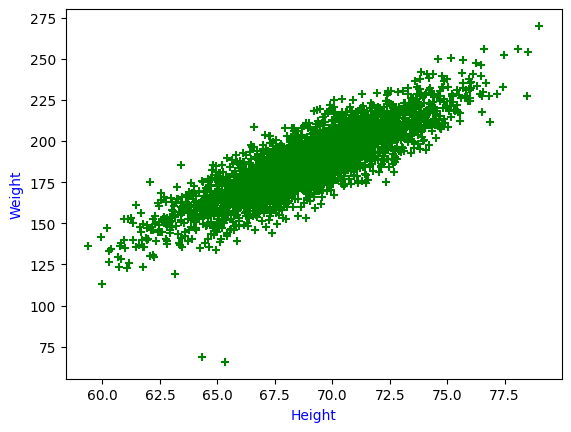

In [25]:
plt.xlabel("Height",color='blue')
plt.ylabel("Weight",color='blue')
plt.scatter(df.Height,df.Weight,marker="+",color='green')

In [21]:
# plt.figure(figsize=(12,8))

## here height is independant (feature[[]]) and weight dependant(label[])

In [28]:
x=df[["Height"]]
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [30]:
y = df["Weight"]
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [33]:
 from sklearn.model_selection import train_test_split as tts

In [36]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=9)
xtrain.head()

,Height
2360,64.682908
927,68.874396
1135,68.850152
1600,66.968936
1266,66.358137


In [37]:
xtest.head()

,Height
2543,69.071314
1504,69.104803
601,67.115564
588,65.651090
2970,68.360606


In [38]:
ytrain.head()

2360    160.789864
927     183.438539
1135    187.578704
1600    169.392797
1266    173.355928
Name: Weight, dtype: float64

In [39]:
ytest.head()

2543    193.434665
1504    184.901892
601     168.202167
588     164.649814
2970    187.923291
Name: Weight, dtype: float64

# linear regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [43]:
m = reg.coef_
c= reg.intercept_

In [44]:
y = m*164+c
print(y)

[753.07567746]


In [45]:
reg.predict([[164]])

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([753.07567746])

In [47]:
reg.predict(xtest)

array([187.15960723, 187.35925204, 175.50043022, ..., 203.50994329,
       172.07804621, 186.43472422])

In [53]:
pred=reg.predict(xtest)

In [54]:
df["Predicted Weight"]= reg.predict(x)

In [55]:
df

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.629894
1,68.781904,162.310473,185.434292
2,74.110105,212.740856,217.198292
3,71.730978,220.042470,203.015158
4,69.881796,206.349801,191.991282
...,...,...,...
3496,69.296830,185.649086,188.504016
3497,70.542201,210.198845,195.928281
3498,73.912549,202.429960,216.020563
3499,67.396021,144.277671,177.172367


# accuracy

In [56]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.729852719355799

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
mse=mean_squared_error(ytest,pred)
mse

105.83421044895562

In [60]:
mae=mean_absolute_error(ytest,pred)
mae

7.8646097906975

# best fit line

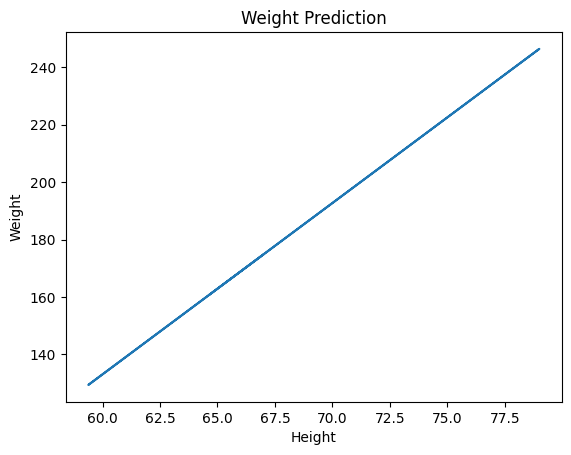

In [64]:
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight Prediction')
# plt.scatter(xtrain, pred,color='red',marker='+')
plt.plot(xtrain,reg.predict(xtrain))

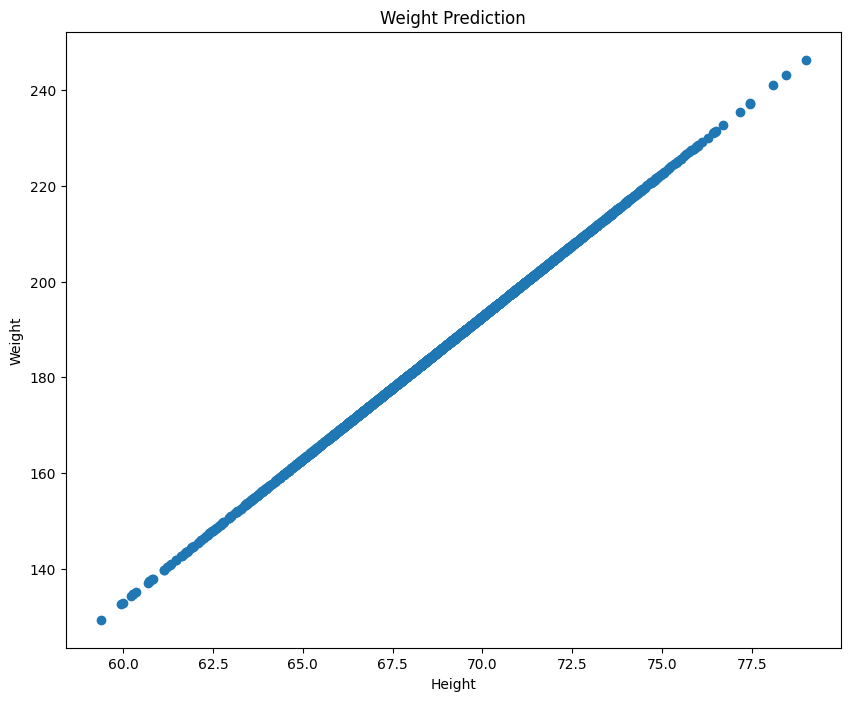

In [65]:
plt.figure(figsize=(10,8))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight Prediction')
plt.scatter(xtrain, reg.predict(xtrain))

# saving model

In [66]:
import pickle as pk
import joblib as jb
pk.dump(reg,open('firstmodel','wb'))

In [68]:
jb.dump(reg,'model_joblib')

['model_joblib']